In [1]:
import pandas as pd
import span as sp
import matplotlib.pyplot as plt

In [18]:
def trace_trimmer(trace_file):
    df = pd.read_csv(trace_file)
    col_len = df.shape[1]
    col_name = ['a', 'b', "trace_id","svc_name","cluster_id","my_span_id","parent_span_id","load","last_load","avg_load","st","et","rt","call_size"]
    df.columns = col_name
    df = df.drop('a', axis=1)
    df = df.drop('b', axis=1)
    df.to_csv("trim-"+trace_file.split("/")[-1])
    return df

In [19]:
log_path = "./trace-west_only-avg_load.csv"
t_df = trace_trimmer(log_path)
display(t_df)

,trace_id,svc_name,cluster_id,my_span_id,parent_span_id,load,last_load,avg_load,st,et,rt,call_size
0,1e523f8ede41942adac2bb5eab0eecef,reviews-v3,0,52891b983b03f9b5,dac2bb5eab0eecef,10,10,10,1697157722258,1697157722271,13,0
1,1e523f8ede41942adac2bb5eab0eecef,ratings-v1,0,4998ecd46441f0c4,52891b983b03f9b5,20,20,20,1697157722266,1697157722269,3,0
2,1e523f8ede41942adac2bb5eab0eecef,details-v1,0,7e763330b20a3ca1,dac2bb5eab0eecef,13,13,13,1697157722234,1697157722237,3,0
3,f94a0aad6c4deb8ac6e52ff6470f8623,productpage-v1,0,c6e52ff6470f8623,NaN,22,22,22,1697157722217,1697157722281,64,0
4,f94a0aad6c4deb8ac6e52ff6470f8623,reviews-v3,0,1f581fbe6f904612,c6e52ff6470f8623,10,10,10,1697157722261,1697157722272,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5174,f3678fd69f686deacaad3dbdd4d0e7c8,reviews-v3,0,107455d04f7f8f70,caad3dbdd4d0e7c8,23,23,23,1697157783343,1697157783351,8,0
5175,a6b929f7f73faafd8b8f2c3aba86ab3a,ratings-v1,0,44da1bc386f12e4f,235839ba581a5c91,28,28,28,1697157783352,1697157783353,1,0
5176,a6b929f7f73faafd8b8f2c3aba86ab3a,details-v1,0,7c6ae0a8b13aa86d,8b8f2c3aba86ab3a,37,37,37,1697157783293,1697157783294,1,0
5177,a6b929f7f73faafd8b8f2c3aba86ab3a,productpage-v1,0,8b8f2c3aba86ab3a,NaN,34,34,34,1697157783231,1697157783414,183,0


In [4]:


df = df.drop('a', axis=1)
df = df.drop('b', axis=1)
neg_load_df = df[df["load"] < 0]
zero_load_df = df[df["load"] == 0]
pos_load_df = df[df["load"] > 0]

neg_load_df = neg_load_df.reset_index(drop=True)
zero_load_df = zero_load_df.reset_index(drop=True)
pos_load_df = pos_load_df.reset_index(drop=True)

df.fillna("", inplace=True)
neg_load_df.fillna("", inplace=True)
zero_load_df.fillna("", inplace=True)
pos_load_df.fillna("", inplace=True)

print(f"len(pos_load_df): {len(pos_load_df)}")
display(pos_load_df)
print(f"len(df): {len(df)}")
display(df)

sum_len = len(pos_load_df) + len(neg_load_df) + len(zero_load_df)
print(f"{len(pos_load_df)}, {len(neg_load_df)}, {len(zero_load_df)}")
print(f"{len(df)}, {sum_len}")


(5180, 12)


KeyError: "['a'] not found in axis"

In [65]:
temp_df = df[df["svc_name"]=="productpage-v1"]
temp_df = temp_df[temp_df["load"] < 0]
temp_df

,trace_id,svc_name,cluster_id,my_span_id,parent_span_id,load,st,et,rt,call_size
1131,8ca948ddfd51019e4df4952021650640,productpage-v1,0,4df4952021650640,,-1,1697095038985,1697095039112,127,0
2058,349fb1c575e0f2f0018429d0407be3b8,productpage-v1,0,018429d0407be3b8,,-2,1697095046083,1697095046238,155,0
2062,32df6f964cccc8dd4e074681366ad82c,productpage-v1,0,4e074681366ad82c,,-1,1697095046085,1697095046315,230,0
2719,23bfb3ec0d2c815b2780aeff242a97b9,productpage-v1,0,2780aeff242a97b9,,-3,1697095053200,1697095053449,249,0
2723,f1c17a9c37722e20c0eaee4a3533f5b0,productpage-v1,0,c0eaee4a3533f5b0,,-2,1697095053201,1697095053479,278,0
2726,6b23e2ab0fd8e78003bcabf7f419ed10,productpage-v1,0,03bcabf7f419ed10,,-1,1697095053201,1697095053536,335,0


In [54]:
len(df[df["rt"] < 0])

0

In [57]:
for idx, row in df.iterrows():
    if type(row["et"]) == type("a"):
        print(row)
    if type(row["st"]) == type("a"):
        print(row)

In [59]:
# with pd.option_context('display.max_rows', None):
#     with pd.option_context('display.max_colwidth', None):
#         display(pos_load_df)

['reviews-v3' 'details-v1' 'productpage-v1' 'ratings-v1']


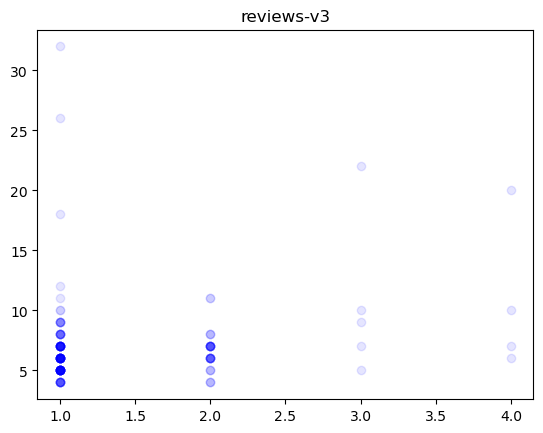

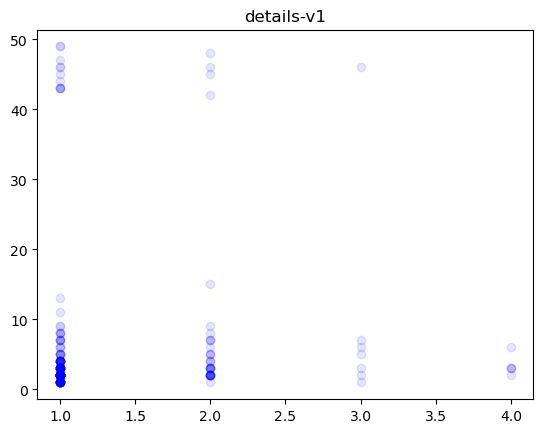

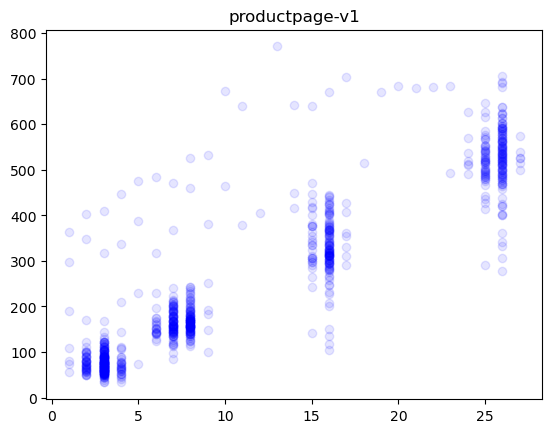

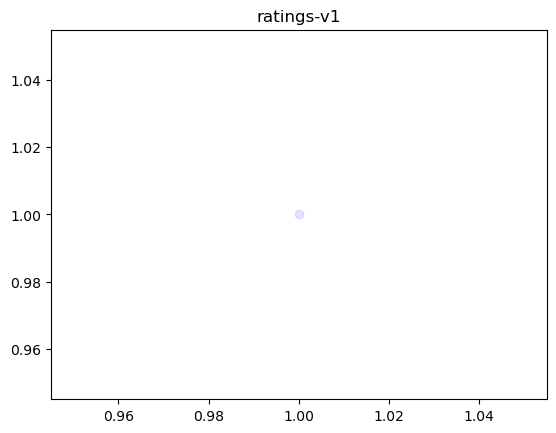

In [58]:
print(pos_load_df["svc_name"].unique())
for svc_name in pos_load_df["svc_name"].unique():
    # if svc_name == "productpage-v1":
    svc_df = pos_load_df[pos_load_df["svc_name"]==svc_name]
    plt.plot(svc_df["load"], svc_df["rt"], "bo", alpha=0.1)
    plt.title(svc_name)
    plt.show()


In [13]:
def create_span_ver2(row):
    trace_id = row["trace_id"]
    cluster_id = row["cluster_id"]
    svc = row["svc_name"]
    span_id = row["my_span_id"]
    parent_span_id = row["parent_span_id"]
    st = row["st"]
    et = row["rt"]
    load = row["load"]
    callsize = row["call_size"]
    span = sp.Span(svc, cluster_id, trace_id, span_id, parent_span_id, st, et, load, callsize)
    return span

# cluster_id -> trace id -> svc_name -> span
traces_ = dict()
for index, row in df.iterrows():
    span = create_span_ver2(row)
    if span.cluster_id not in traces_:
        traces_[span.cluster_id] = dict()
    if span.trace_id not in traces_[span.cluster_id]:
        traces_[span.cluster_id][span.trace_id] = dict()
    if span.svc_name not in traces_[span.cluster_id][span.trace_id]:
        traces_[span.cluster_id][span.trace_id][span.svc_name] = span
    else:
        print_error(span.svc_name + " already exists in trace["+span.trace_id+"]")


for cid in traces_:
    for trace_id, single_trace in traces_[cid].items():
        for svc, span in single_trace.items():
            print(span)

SPAN,67364029828b033a547713ae44400545,details-v1,0,08c93ae36e189244,547713ae44400545,17,1697048924126,9,-1697048924117,0
SPAN,67364029828b033a547713ae44400545,ratings-v1,0,66d9ef51c276615f,b8e5c5468d9e4961,26,1697048924154,5,-1697048924149,0
SPAN,67364029828b033a547713ae44400545,productpage-v1,0,547713ae44400545,nan,55,1697048924094,74,-1697048924020,0
SPAN,67364029828b033a547713ae44400545,reviews-v3,0,b8e5c5468d9e4961,547713ae44400545,55,1697048924143,18,-1697048924125,0
SPAN,3585b0e5bc790e6d9ab22e8fbbf05837,details-v1,0,c1ecc6a789ef705c,9ab22e8fbbf05837,17,1697048924127,14,-1697048924113,0
SPAN,3585b0e5bc790e6d9ab22e8fbbf05837,ratings-v1,0,63c9a129b11c906a,35e77f9a39547a65,26,1697048924166,2,-1697048924164,0
SPAN,3585b0e5bc790e6d9ab22e8fbbf05837,productpage-v1,0,9ab22e8fbbf05837,nan,55,1697048924092,98,-1697048923994,0
SPAN,3585b0e5bc790e6d9ab22e8fbbf05837,reviews-v3,0,35e77f9a39547a65,9ab22e8fbbf05837,55,1697048924162,8,-1697048924154,0
SPAN,d2c57964c9aeaff80168f783e0c88a99,details-